![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 1. Generalized Linear Regression (Gaussian)

In this tutorial, we will explore Generalized Linear Models (GLMs), focusing on the Gaussian distribution, one of the most commonly used in GLMs. These models extend linear regression, enabling us to analyze a wider range of data types and relationships. We will start with an overview of GLM structure, discussing the random component (distribution), systematic component (predictors), and link function (mean transformation). We will establish a solid understanding of the fundamentals by constructing a GLM model using synthetic data without built-in R packages. Next, we will fit a GLM using R’s `glm()` function, interpreting the output to assess the influence of predictors and their statistical significance. We will also evaluate model performance and use R’s visualization libraries to create helpful graphics to interpret our results. This tutorial will equip you with the theoretical foundation and practical skills to confidently apply Gaussian GLMs in R for various statistical modeling applications.





## Overview

**Generalized Linear Models (GLMs)** with a Gaussian distribution are useful for modeling relationships between a continuous response variable and one or more explanatory variables when the error terms are normally distributed. This is a generalization of linear regression where the assumptions of `Gaussian` distribution apply. Here's an outline of the mathematical background and the steps to fit such a model.

1.  **Model Specification**:

    -   The model assumes that the dependent variable $Y$ follows a Gaussian (normal) distribution:
    
 $$ Y \sim \mathcal{N}(\mu, \sigma^2) $$

  -   Here, $\mu$ (the mean of $Y$) is modeled as a linear combination of predictors $X$, so:

 $$ \mu = X\beta $$

 -   Therefore, the model can be written as:

        $$ Y = X\beta + \epsilon $$

        where $\epsilon \sim \mathcal{N}(0, \sigma^2)$ represents the error term.

2.  **Link Function**:

    -   The identity link function is used for Gaussian models, meaning that we assume $E[Y | X] = X\beta$.

3.  **Parameter Estimation**:

    -   The coefficients $\beta$ are estimated by minimizing the sum of squared errors (SSE):

    $$ \text{SSE} = \sum_{i=1}^n (Y_i - X_i\beta)^2 $$

    -   The solution is given by:

    $$\beta = (X^T X)^{-1} X^T Y$$

    -   This is derived using calculus (specifically, by taking the derivative of SSE with respect to ( $\beta$ ), setting it to zero, and solving).

4.  **Prediction**:

    -   Once ( $\beta$ ) is estimated, we can predict new values of $Y$ as:

    $$ \hat{Y} = X\beta $$

5.  **Interpretation**:

    -   Each coefficient $\beta_j$ represents the change in $Y$ for a one-unit increase in $X_j$, holding other predictors constant.



## GLM Regresion Model from Scratch

To fit a Generalized Linear Model (GLM) with a Gaussian distribution in R without using any packages, we’ll walk through each step, from generating synthetic data to estimating the model parameters and creating a summary statistics table. Let’s break down each mathematical concept and translate it into R code.

Steps to Fit the Model in R are below:

### Generate Synthetic Data

We'll start by generating synthetic data with four covariates and a continuous response variable.

1.  **Define Number of Observations**: ( $n$ = 100 ).

2.  **Generate Covariates** ($X_1, X_2, X_3, X_4$ ) from a normal distribution with mean ( 0 ) and standard deviation ( 1 ).

3.  **Specify True Coefficients**: Choose known values for the coefficients ($\beta_0$ = 5 ) (intercept), ($\beta$ = \[1.5, -2.0, 0.5, 3.0\]).

4.  **Generate the Response Variable (\$Y)** using the formula:

    $$ Y = \beta\_0 + \beta\_1 X_1 + \beta\_2 X_2 + \beta\_3 X_3 + \beta\_4 X_4 + \epsilon$$

where $\epsilon \sim N(0, 1)$ represents Gaussian noise.

In [8]:
# Step 1: Generate Synthetic Data
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
n = 100

# Generate covariates
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)
X3 = np.random.normal(0, 1, n)
X4 = np.random.normal(0, 1, n)

# Define true coefficients
beta_0 = 5
beta_true = np.array([1.5, -2.0, 0.5, 3.0])

# Generate response variable Y
Y = beta_0 + beta_true[0]*X1 + beta_true[1]*X2 + beta_true[2]*X3 + beta_true[3]*X4 + np.random.normal(0, 1, n)

### Define the Design Matrix ( $X$ )

To estimate the coefficients, we need a design matrix ($X$) that includes an intercept term. The matrix ($X$) will look like this:

$$ X =
\begin{bmatrix}
1 & X_{1,1} & X_{1,2} & X_{1,3} & X_{1,4} \\
1 & X_{2,1} & X_{2,2} & X_{2,3} & X_{2,4} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & X_{n,1} & X_{n,2} & X_{n,3} & X_{n,4}
\end{bmatrix} $$

where the first column is all ones for the intercept, and the remaining columns are values of the covariates ( \$X_1, X_2, X_3, X_4 \$) for each observation.

In [9]:
# Step 2: Define Design Matrix X with Intercept
X = np.column_stack((np.ones(n), X1, X2, X3, X4))
print("Design Matrix (first 5 rows):\n", X[:5])

Design Matrix (first 5 rows):
 [[ 1.          0.49671415 -1.41537074  0.35778736 -0.82899501]
 [ 1.         -0.1382643  -0.42064532  0.56078453 -0.56018104]
 [ 1.          0.64768854 -0.34271452  1.08305124  0.74729361]
 [ 1.          1.52302986 -0.80227727  1.05380205  0.61037027]
 [ 1.         -0.23415337 -0.16128571 -1.37766937 -0.02090159]]



### Estimate Coefficients Using the Normal Equation

For Gaussian GLMs, estimating the coefficients ( $\beta$) reduces to solving the **Normal Equation**:

$$\hat{\beta} = (X^T X)^{-1} X^T Y$$

**Compute** $X^TX$: This is the matrix product of the transpose of ($X$) with ($X$).

**Compute** $(X^T X)^{-1}$: Invert the result from step 1.

**Compute** $X^T Y$: This is the product of the transpose of $X$ and the response vector ($Y$ ).

**Solve for** $\hat{\beta}$: Multiply the results from step 2 with step 3 to obtain the estimated coefficients.


In [10]:
# Step 3: Estimate Coefficients Using Normal Equation
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
XtY = X.T @ Y
beta_hat = XtX_inv @ XtY
print("Estimated Coefficients:\n", beta_hat)

Estimated Coefficients:
 [ 4.91119594  1.43078038 -1.79572418  0.41362802  3.24953456]


### Calculate Fitted Values and Residuals

-   \*\*Fitted Values $\hat{Y}$: Using the estimated coefficients $\hat{\beta}$, calculate the fitted values as:

$$ \hat{Y} = X \hat{\beta}$$

-   **Residuals**: Calculate the residuals, which represent the difference between the observed values $Y$ and fitted values $\hat{Y}$:

$$ \text{residuals} = Y - \hat{Y} $$


In [11]:
# Step 4: Calculate Fitted Values and Residuals
Y_hat = X @ beta_hat
residuals = Y - Y_hat
print("Residuals (first 5):\n", residuals[:5])

Residuals (first 5):
 [-0.9443495  -0.2459933   0.1159585   0.34380454 -0.458299  ]


### Compute Mean Squared Error (MSE) and Variance of Residuals

The Mean Squared Error (MSE) measures the average of the squared residuals:

$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

The variance of the residuals, used for calculating standard errors, is given by:

$$ \text{Var(residuals)} = \frac{1}{n - p - 1}\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

where ($p$ ) is the number of covariates (in our case, ( p = 4)

In [12]:
# Step 5: Calculate MSE and Variance of Residuals
mse = np.mean(residuals**2)
p = 4  # Number of covariates
variance_residuals = np.sum(residuals**2) / (n - len(beta_hat))

print(f"Mean Squared Error (MSE): {mse}")
print(f"Variance Residuals: {variance_residuals}")


Mean Squared Error (MSE): 1.0118140458194602
Variance Residuals: 1.0650674166520633


### Calculate Standard Errors and t-values for Coefficients

-   **Standard Errors**: The standard error for each coefficient ( \hat{\beta}\_j ) is given by:

$$ \text{Std Error}(\hat{\beta}*j) =* \sqrt{\text{Var(residuals)} \times [ (X^T X)^{-1} ]_{jj} } $$

where ( $[(X^T X)^{-1}]{jj}$ is the $j-th$ diagonal element of the inverse of $X^T X$\$

-   **t-values**: The t-value for each coefficient tests the null hypothesis that the coefficient is zero. It is calculated as:

$$t\text{-value} = \frac{\hat{\beta}_j}{\text{Std Error}(\hat{\beta}_j)}$$

In [ ]:
!pip install pandas scikit-learn matplotlib

In [13]:
import pandas as pd
import numpy as np

# Step 6: Calculate Standard Errors and t-values
std_errors = np.sqrt(variance_residuals * np.diag(XtX_inv))
t_values = beta_hat / std_errors

# Create Summary Table
summary_table = pd.DataFrame({
    'Coefficient': beta_hat,
    'Std Error': std_errors,
    't-value': t_values
})
print("Summary Table:\n", summary_table)


Summary Table:
    Coefficient  Std Error    t-value
0     4.911196   0.104764  46.878525
1     1.430780   0.119263  11.996806
2    -1.795724   0.109889 -16.341312
3     0.413628   0.097509   4.241942
4     3.249535   0.119226  27.255343


### Model Performance

Evaluating a Generalized Linear Model (GLM) involves several key metrics to assess its fit and predictive power. Below, I’ll outline the main evaluation metrics commonly used for a Gaussian GLM, along with their calculations.


#### Evaluation Matrix


1. ***Mean Squared Error (MSE)***:
   - Measures the average of the squares of the errors (residuals), which is the difference between the predicted and actual values.
   
   $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $$

2. ***Root Mean Squared Error (RMSE)***:

   - The square root of MSE, providing an error metric in the same units as the response variable.
   
   $$ \text{RMSE} = \sqrt{\text{MSE}} $$
   

3. ***Mean Absolute Error (MAE)***:

   - Measures the average absolute errors, providing a straightforward interpretation of the average error magnitude.

   $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i|$$


4. ***R-squared ($R^2$)***:

   - Indicates the proportion of variance in the response variable that can be explained by the model.

   $$ R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}  $$
   where:
   
   - $\text{SS}_{\text{res}} = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $
   - $\text{SS}_{\text{tot}} = \sum_{i=1}^{n} (Y_i - \bar{Y})^2 $

5. ***Adjusted R-squared***:

   - Adjusts the R-squared value based on the number of predictors in the model, providing a more accurate assessment when comparing models.
   
   $$ \text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right) $$
   
   where  $p$ is the number of predictors.

6. ***Akaike Information Criterion (AIC)***:

   - Provides a measure of model quality that accounts for the number of parameters.
   
   $$  \text{AIC} = n \log\left(\frac{\text{SS}_{\text{res}}}{n}\right) + 2p  $$

7. ***Bayesian Information Criterion (BIC)***:

   - Similar to AIC but with a larger penalty for models with more parameters.
   
   $$   \text{BIC} = n \log\left(\frac{\text{SS}_{\text{res}}}{n}\right) + p \log(n)$$
   

In [14]:
# Step 7: Model Performance Metrics
# MSE (already calculated)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(Y - Y_hat))

# R-squared
ss_res = np.sum((Y - Y_hat)**2)
ss_tot = np.sum((Y - np.mean(Y))**2)
r_squared = 1 - (ss_res / ss_tot)

# Adjusted R-squared
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)

# AIC
aic = n * np.log(ss_res / n) + 2 * (p + 1)  # +1 for intercept

# BIC
bic = n * np.log(ss_res / n) + (p + 1) * np.log(n)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")
print(f"Akaike Information Criterion (AIC): {aic}")
print(f"Bayesian Information Criterion (BIC): {bic}")

Mean Squared Error (MSE): 1.0118140458194602
Root Mean Squared Error (RMSE): 1.0058896787518303
Mean Absolute Error (MAE): 0.8010848719693233
R-squared: 0.9263958410884733
Adjusted R-squared: 0.9232967186079879
Akaike Information Criterion (AIC): 11.174480479106633
Bayesian Information Criterion (BIC): 24.200331409047088



#### K-fold Cross-validation

-   **Split the Data**: Randomly divide the dataset into $K$ equal-sized folds.

-   **Training and Testing**:

    -   For each fold, use $k-1$ folds for training the model and the remaining fold for testing.

    -   Repeat this process $k$ times, ensuring that each fold serves as the test set once.

-   **Model Fitting**: Fit the GLM on the training set for each iteration.

-   **Prediction**: Use the fitted model to make predictions on the test set.

-   **Performance Metrics**: Calculate evaluation metrics (e.g., MSE, RMSE, MAE, etc.) for each fold.

-   **Aggregate Results**: Compute the average and standard deviation of the performance metrics across all folds

In [15]:
# Step 8: K-fold Cross-Validation
k = 10
folds = np.random.choice(k, n, replace=True)
cv_mse = np.zeros(k)

for i in range(k):
    test_indices = np.where(folds == i)[0]
    train_indices = np.setdiff1d(np.arange(n), test_indices)
    
    X_train, Y_train = X[train_indices], Y[train_indices]
    X_test, Y_test = X[test_indices], Y[test_indices]
    
    # Fit model on training data
    XtX_train = X_train.T @ X_train
    XtX_inv_train = np.linalg.inv(XtX_train)
    XtY_train = X_train.T @ Y_train
    beta_hat_train = XtX_inv_train @ XtY_train
    
    # Predict on test set
    Y_pred = X_test @ beta_hat_train
    
    # Calculate MSE for this fold
    cv_mse[i] = np.mean((Y_test - Y_pred)**2)

average_cv_mse = np.mean(cv_mse)
print(f"Average K-Fold Cross-Validation MSE: {average_cv_mse}")

Average K-Fold Cross-Validation MSE: 1.0960584555061874


#### 1:1 Plot Predicted vs Observed Values

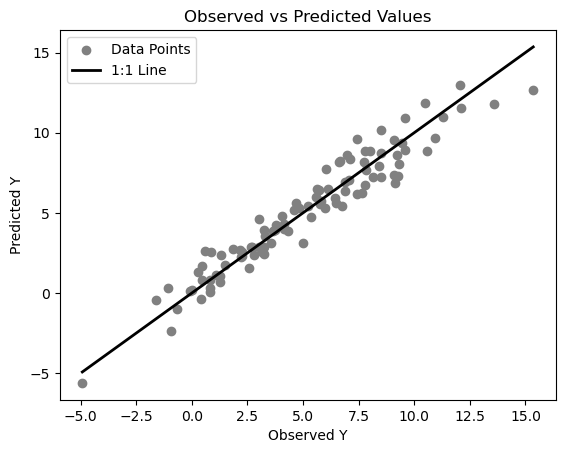

In [16]:
import matplotlib.pyplot as plt

# Plot Observed vs Predicted Values
plt.scatter(Y, Y_hat, c='grey', marker='o', label='Data Points')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k-', lw=2, label='1:1 Line')
plt.xlabel('Observed Y')
plt.ylabel('Predicted Y')
plt.title('Observed vs Predicted Values')
plt.legend()
plt.show()

## GLM Regression Model  with Python

In Python, GLMs can be implemented using the {statsmodels} library, which supports various distribution families (e.g., Gaussian, Poisson, Binomial) and link functions (e.g., identity, log, logit).

### Data Loading and Preparation

Our goal is to develop a GLM regression model to predict paddy soil arsenic (`SAs`) concentration using various irrigation water and soil properties. We have available data of 263 paired groundwater and paddy soil samples from arsenic contaminated areas in Tala Upazilla, Satkhira district, Bangladesh. This data was utilized in a publication titled "Factors Affecting Paddy Soil Arsenic Concentration in Bangladesh: Prediction and Uncertainty of Geostatistical Risk Mapping" which can be accessed via the this [URL](https://doi.org/10.1016/j.scitotenv.2011.10.008)

Full data set is available for download can download from my [Dropbox](https://www.dropbox.com/scl/fo/2rh6r68i9cxmgortvbw8q/h?rlkey=bvntt66n9mcywprmdki08ch3r&dl=0) or from my [Github](https://github.com/zia207/r-colab/tree/main/Data/Regression_analysis) accounts.

We will apply following operation before fit a GLM regression model.

1.  **Feature engineering**: Feature engineering is a vital task in the data preparation process for data analysis, particularly for machine learning models. It is the practice of creating new features from existing ones or transforming them to enhance the machine learning algorithm's performance. Doing so makes achieving higher accuracy, better generalization, and a more straightforward interpretation of the model possible. Some standard techniques used in feature engineering include dimensionality reduction, feature scaling, and feature extraction. When performing feature engineering, it is essential to consider the data type, distribution, and target variable, among other factors.

We will create a new feature (Sand_Silt) by adding soil Silt and Sand percentage

2.  **Convert to factors**: As Land_type is categorical variable representing distinct categories rather than numerical values, we need to convert them into factors. This process will allow us to analyze and interpret the data more accurately, facilitating a better understanding of the underlying patterns and trends.

3.  **Data normalization**: It is a technique used in data analysis and machine learning. It involves adjusting numerical values to a standard range, usually between 0 and 1 or with a mean of 0 and a standard deviation of 1. This helps to improve the efficiency and accuracy of machine learning algorithms. Data normalization is important because it helps machine learning models work better. By standardizing the data, the models can more easily identify patterns and relationships in the data, which leads to better predictions and results.

In [17]:
# Load data
mf = pd.read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/bd_soil_arsenic.csv")

# Select variables
df = mf[['WAs', 'WP', 'WFe', 'WEc', 'WpH', 'SAoFe', 'SpH', 'SOC', 
         'Sand', 'Silt', 'SP', 'Elevation', 'Year_Irrigation', 
         'Distance_STW', 'Land_type', 'SAs']]

# Feature engineering: Create Silt_Sand
df['Silt_Sand'] = df['Silt'] + df['Sand']
df = df.drop(['Silt', 'Sand'], axis=1)

# Convert Land_type to categorical
df['Land_type'] = df['Land_type'].astype('category')

# Normalize numerical features
numerical_cols = ['WAs', 'WP', 'WFe', 'WEc', 'WpH', 'SAoFe', 'SpH', 
                  'SOC', 'SP', 'Elevation', 'Year_Irrigation', 'Distance_STW', 'Silt_Sand']
for col in numerical_cols:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Relocate columns
df = df[['WAs', 'WP', 'WFe', 'WEc', 'WpH', 'SAoFe', 'SpH', 'SOC', 'SP', 
         'Elevation', 'Year_Irrigation', 'Distance_STW', 'Silt_Sand', 'Land_type', 'SAs']]

print(df.head())

        WAs        WP       WFe       WEc       WpH     SAoFe       SpH  \
0  0.107383  0.219493  0.180435  0.169761  0.459184  0.380711  0.552995   
1  0.107383  0.393878  0.342391  0.180371  0.489796  0.423858  0.612903   
2  0.152125  0.443415  0.860870  0.267905  0.265306  0.294416  0.686636   
3  0.248322  0.535240  0.739130  0.116711  0.275510  0.380711  0.705069   
4  0.136465  0.302054  0.326087  0.273210  0.377551  0.269036  0.585253   

        SOC        SP  Elevation  Year_Irrigation  Distance_STW  Silt_Sand  \
0  0.533333  0.227792      0.250         0.684211      0.047619   0.613946   
1  0.342857  0.258272      0.500         1.000000      0.071429   0.591837   
2  0.390476  0.262883      0.375         0.473684      0.047619   0.573129   
3  0.509524  0.277722      0.250         0.368421      0.119048   0.532313   
4  0.342857  0.236014      0.500         0.473684      0.047619   0.646259   

  Land_type   SAs  
0       MHL  29.1  
1       MHL  45.1  
2       MHL  23.2  


/tmp/ipykernel_1428001/3342302110.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Silt_Sand'] = df['Silt'] + df['Sand']


#### Summary Statistics

In [18]:
# Summary statistics
summary_stats = df[numerical_cols + ['SAs']].describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
               WAs          WP         WFe         WEc         WpH       SAoFe  \
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000   
mean     0.265956    0.359281    0.381828    0.242794    0.435128    0.405329   
std      0.177279    0.148248    0.213940    0.188909    0.143333    0.158970   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.142058    0.263592    0.219022    0.106101    0.336735    0.324873   
50%      0.241611    0.353605    0.356522    0.183820    0.438776    0.398477   
75%      0.366890    0.447040    0.505435    0.328912    0.520408    0.468274   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              SpH         SOC          SP   Elevation  Year_Irrigation  \
count  263.000000  263.000000  263.000000  263.000000       263.000000   
mean     0.726919    0.390368    0.264548    0.409696         0.316590   
std      0.142506    0.1463

#### Correlation

In [19]:
# Correlation with SAs
correlations = df[numerical_cols + ['SAs']].corr()['SAs'].drop('SAs')
print("Correlation with SAs:\n", correlations)

Correlation with SAs:
 WAs                0.235157
WP                 0.151697
WFe                0.320888
WEc                0.145622
WpH               -0.014374
SAoFe             -0.108609
SpH                0.019219
SOC                0.338538
SP                 0.127393
Elevation         -0.340564
Year_Irrigation    0.527705
Distance_STW      -0.201047
Silt_Sand         -0.264616
Name: SAs, dtype: float64


#### Boxplot and Jitter Plots

In [28]:
# !pip install seaborn

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


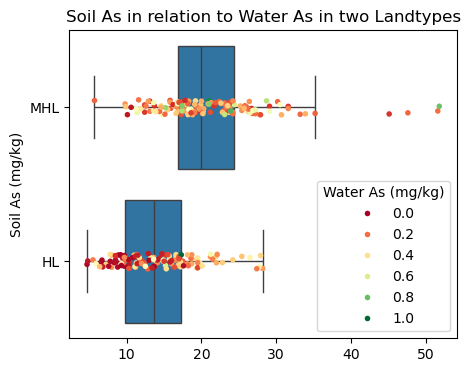

In [22]:
# Boxplot with jitter

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.boxplot(y='Land_type', x='SAs', data=df, flierprops={'marker': 'None'})
sns.stripplot(y='Land_type', x='SAs', hue='WAs', size=4, data=df, jitter=0.05, palette='RdYlGn')
plt.title('Soil As in relation to Water As in two Landtypes')
plt.xlabel('')
plt.ylabel('Soil As (mg/kg)')
plt.legend(title='Water As (mg/kg)')
plt.gca().invert_yaxis()  # Flip to match R's coord_flip
plt.show()


#### Split Data



In [23]:
# Stratified sampling
np.random.seed(11076)
tr_prop = 0.7
train = df.groupby('Land_type').apply(lambda x: x.sample(frac=tr_prop, random_state=101)).reset_index(drop=True)
test = df.drop(train.index).reset_index(drop=True)

print(f"Training set size: {len(train)}")
print(f"Test set size: {len(test)}")

Training set size: 184
Test set size: 79


/tmp/ipykernel_1428001/182700637.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train = df.groupby('Land_type').apply(lambda x: x.sample(frac=tr_prop, random_state=101)).reset_index(drop=True)
/tmp/ipykernel_1428001/182700637.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train = df.groupby('Land_type').apply(lambda x: x.sample(frac=tr_prop, random_state=101)).reset_index(drop=True)


**Stratified random sampling** is a technique for selecting a representative sample from a population, where the sample is chosen in a way that ensures that certain subgroups within the population are adequately represented in the sample.

### Fit a GLM Regression Model

In the context of a GLM with continuous response variables, the focus is on regression problems where the dependent variable, which is being predicted, is continuous. This implies that the variable can take any value within a specific range, and the objective is to identify a correlation between the dependent variable and the independent variables that can be used to make accurate predictions.




In [ ]:
%pip install statsmodels    

In [ ]:

This tutorial equipped you with a thorough understanding of Gaussian GLMs, from constructing models and using Python’s built-in functions to interpreting results and evaluating model performance. With knowledge of theoretical underpinnings and practical tools, you are now well-prepared to perform GLM regression analysis in R. The tutorial highlighted various packages that simplify and enhance interpretation, allowing you to select the tools that best align with your analytically goals—whether prioritizing simplicity, flexibility, or advanced customization. Armed with this knowledge, you can confidently apply GLM regression techniques to analyze continuous data in diverse fields and effectively communicate your findings through clear interpretations and visuals, making GLMs an invaluable tool in your data analysis toolkit.
# Convert categorical variables to dummy variables
X_train = pd.get_dummies(X_train, columns=['Land_type'], drop_first=True)

# Ensure all columns in X_train are numeric
for col in X_train.columns:
    if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category':
        print(f"Warning: Non-numeric column detected: {col}, dtype: {X_train[col].dtype}")
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

# Ensure y_train is numeric
if y_train.dtype == 'object' or y_train.dtype.name == 'category':
    print(f"Warning: Non-numeric y_train detected, dtype: {y_train.dtype}")
    y_train = pd.to_numeric(y_train, errors='coerce')

# Add intercept
X_train = sm.add_constant(X_train)



# Convert to float64 to ensure compatibility
X_train = X_train.astype(np.float64)
y_train = y_train.astype(np.float64)

# Fit GLM
try:
    fit_glm = sm.GLM(y_train, X_train, family=sm.families.Gaussian()).fit()
    print(fit_glm.summary())
except Exception as e:
    print(f"Error fitting GLM: {e}")
    print("X_train sample:\n", X_train.head())
    print("y_train sample:\n", y_train.head())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    SAs   No. Observations:                  184
Model:                            GLM   Df Residuals:                      169
Model Family:                Gaussian   Df Model:                           14
Link Function:               Identity   Scale:                          30.289
Method:                          IRLS   Log-Likelihood:                -567.05
Date:                Fri, 08 Aug 2025   Deviance:                       5118.8
Time:                        15:23:55   Pearson chi2:                 5.12e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5943
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.1686      4.605     

### Plot Coefficients with 95% Confidence Intervals    

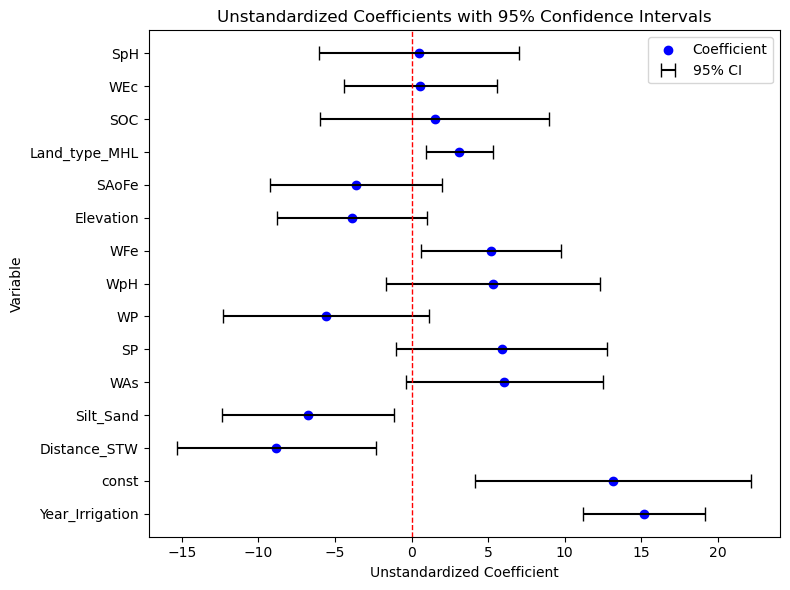

In [ ]:
# Extract coefficients and confidence intervals
coef_table = fit_glm.summary2().tables[1]
coefs = np.array(coef_table['Coef.'])
ci_lower = np.array(coef_table['[0.025'])
ci_upper = np.array(coef_table['0.975]'])
variables = coef_table.index

# Create DataFrame for plotting
plot_data = pd.DataFrame({
    'Variable': variables,
    'Coef': coefs,
    'CI_Lower': ci_lower,
    'CI_Upper': ci_upper
})

# Sort by absolute coefficient value
plot_data = plot_data.sort_values(by='Coef', key=abs, ascending=False)

# Convert to NumPy arrays to avoid pandas indexing issues
coefs = np.array(plot_data['Coef'])
ci_lower = np.array(plot_data['CI_Lower'])
ci_upper = np.array(plot_data['CI_Upper'])
variables = np.array(plot_data['Variable'])

# Plot unstandardized coefficients with CIs
plt.figure(figsize=(8, 6))
y_pos = np.arange(len(variables))
plt.scatter(coefs, y_pos, color='blue', label='Coefficient')
plt.errorbar(
    x=coefs,
    y=y_pos,
    xerr=(coefs - ci_lower, ci_upper - coefs),
    fmt='none',
    c='black',
    capsize=5,
    label='95% CI'
)
plt.yticks(y_pos, variables)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.title('Coefficients with 95% Confidence Intervals')
plt.legend()
plt.tight_layout()
plt.show()

### Model Performance

In [38]:
# Predict on training set
y_pred_train = fit_glm.predict(X_train)

# Performance metrics
mse = np.mean((y_train - y_pred_train)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_train - y_pred_train))
ss_res = np.sum((y_train - y_pred_train)**2)
ss_tot = np.sum((y_train - y_train.mean())**2)
r_squared = 1 - (ss_res / ss_tot)
n, p = len(y_train), X_train.shape[1] - 1
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)
aic = fit_glm.aic
bic = fit_glm.bic_llf

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

MSE: 27.819762826822735
RMSE: 5.274444314505817
MAE: 3.9180670160660265
R-squared: 0.49451587756269266
Adjusted R-squared: 0.4526414532187737
AIC: 1164.1067658769903
BIC: 1212.330802241125


### Visualization of Model Assumptions

To visualize the assumptions of a Generalized Linear Model (GLM) in Python, we need to check key assumptions for a Gaussian GLM (equivalent to linear regression in this case, as used in your code with `family=sm.families.Gaussian()`). The main assumptions for a Gaussian GLM are:
1. **Linearity**: The relationship between predictors and the response (via the identity link) is linear.
2. **Normality of Residuals**: Residuals should be approximately normally distributed.
3. **Homoscedasticity**: Residuals should have constant variance across fitted values.
4. **Independence**: Observations are independent (often assessed via study design or residual patterns).
5. **No Multicollinearity**: Predictors should not be highly correlated (optional, but useful to check).


We’ll create the following plots:

1. **Residuals vs. Fitted Values**: Checks linearity and homoscedasticity.
2. **Q-Q Plot**: Assesses normality of residuals.
3. **Scale-Location Plot**: Checks homoscedasticity by plotting standardized residuals against fitted values.
4. **Residuals vs. Predictors**: Checks linearity for each predictor (optional, included for key variables).
5. **VIF Plot (Optional)**: Visualizes Variance Inflation Factors to assess multicollinearity.




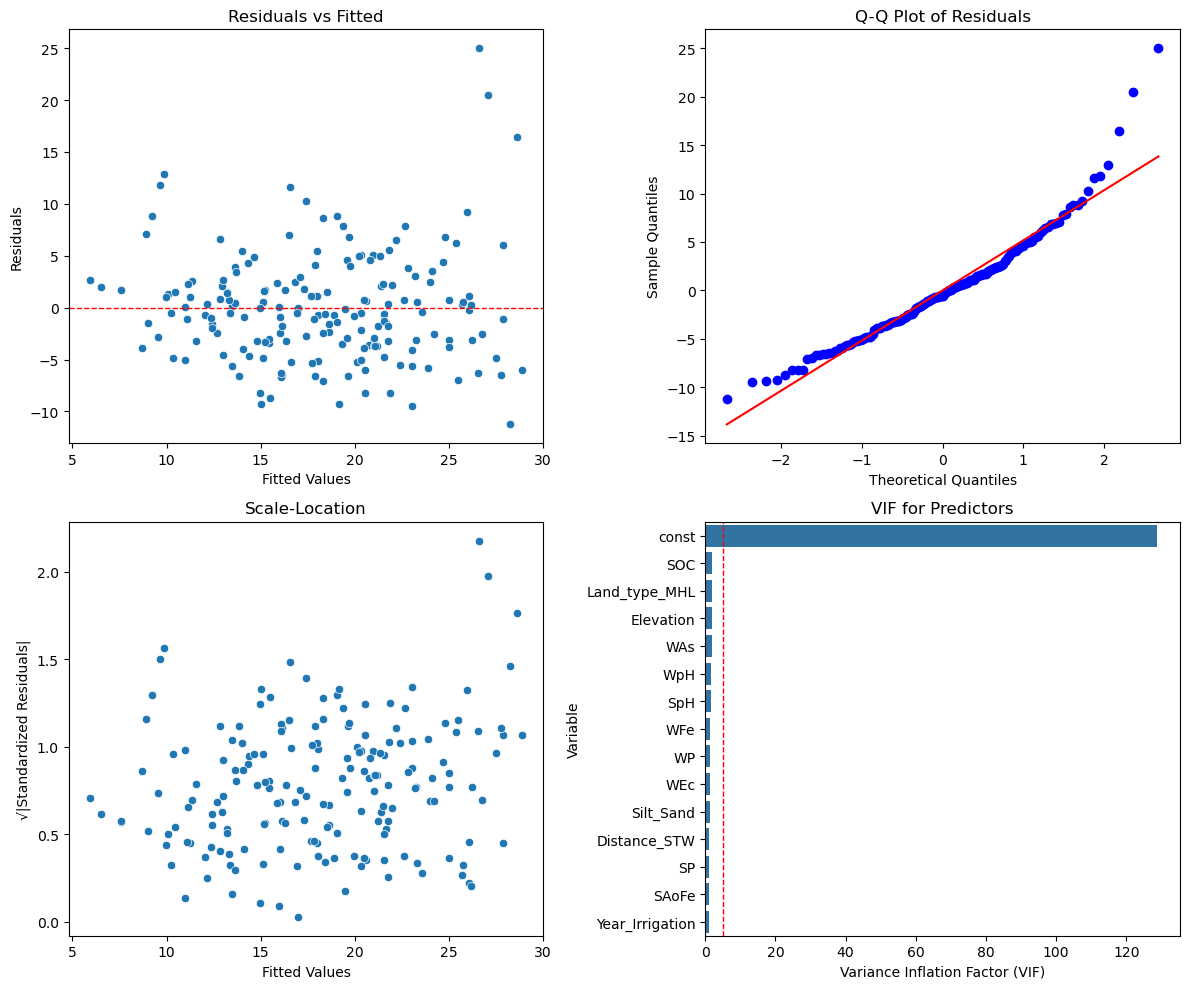

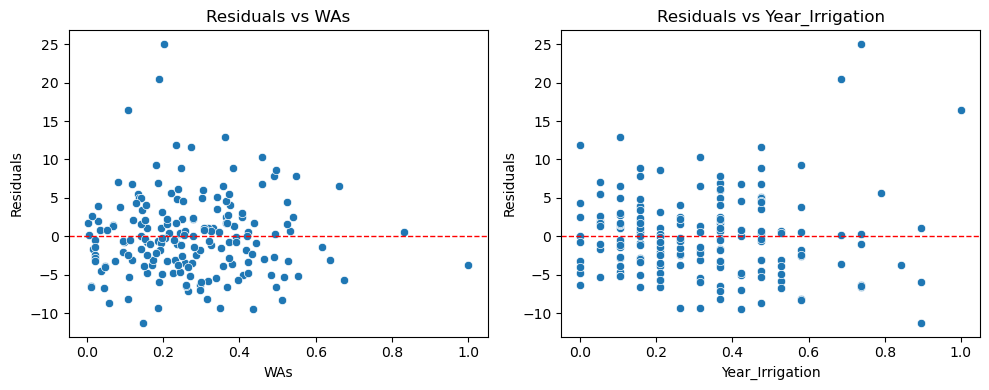

In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats



# Get fitted values and residuals
y_pred = fit_glm.fittedvalues
residuals = y_train - y_pred
standardized_residuals = residuals / np.std(residuals)

# Create subplots for diagnostic plots
fig = plt.figure(figsize=(12, 10))

# 1. Residuals vs Fitted Values (Linearity and Homoscedasticity)
ax1 = fig.add_subplot(221)
sns.scatterplot(x=y_pred, y=residuals, ax=ax1)
ax1.axhline(0, color='red', linestyle='--', linewidth=1)
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

# 2. Q-Q Plot (Normality)
ax2 = fig.add_subplot(222)
stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot of Residuals')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Sample Quantiles')

# 3. Scale-Location Plot (Homoscedasticity)
ax3 = fig.add_subplot(223)
sns.scatterplot(x=y_pred, y=np.sqrt(np.abs(standardized_residuals)), ax=ax3)
ax3.set_xlabel('Fitted Values')
ax3.set_ylabel('√|Standardized Residuals|')
ax3.set_title('Scale-Location')

# 4. VIF Plot (Multicollinearity)
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
ax4 = fig.add_subplot(224)
sns.barplot(x='VIF', y='Variable', data=vif_data.sort_values('VIF', ascending=False), ax=ax4)
ax4.axvline(5, color='red', linestyle='--', linewidth=1)  # Common VIF threshold
ax4.set_xlabel('Variance Inflation Factor (VIF)')
ax4.set_title('VIF for Predictors')

plt.tight_layout()
plt.show()

# Optional: Residuals vs Key Predictors (e.g., WAs, Year_Irrigation)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
key_predictors = ['WAs', 'Year_Irrigation']
for i, predictor in enumerate(key_predictors):
    if predictor in X_train.columns:
        sns.scatterplot(x=X_train[predictor], y=residuals, ax=axes[i])
        axes[i].axhline(0, color='red', linestyle='--', linewidth=1)
        axes[i].set_xlabel(predictor)
        axes[i].set_ylabel('Residuals')
        axes[i].set_title(f'Residuals vs {predictor}')
plt.tight_layout()
plt.show()

### Marginal Effects and Adjusted Predictions

The presentation of regression models, typically in the form of tables, is widely accepted as a clear and accessible method for interpreting results. However, for more intricate models that incorporate interaction or transformed terms, such as quadratic or spline terms, the use of raw regression coefficients may prove less effective, resulting in challenges when interpreting outcomes. In such cases, adjusted predictions or marginal means provide a more fitting solution. The use of visual aids can also assist in the comprehension of such effects or predictions, providing an intuitive understanding of the relationship between predictors and outcomes, even for complex models.



In [40]:
# Marginal effects for Land_type
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF to check multicollinearity (similar to check_collinearity in R)
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("VIF:\n", vif_data)

# Marginal effects (approximated for categorical variable)
land_type_effects = fit_glm.get_prediction(X_train).summary_frame()
print("Marginal Effects for Land_type:\n", land_type_effects)

VIF:
            Variable         VIF
0             const  128.834555
1               WAs    1.794553
2                WP    1.435448
3               WFe    1.440326
4               WEc    1.385384
5               WpH    1.556078
6             SAoFe    1.142019
7               SpH    1.540655
8               SOC    1.953300
9                SP    1.173350
10        Elevation    1.794729
11  Year_Irrigation    1.122064
12     Distance_STW    1.198196
13        Silt_Sand    1.230672
14    Land_type_MHL    1.885415
Marginal Effects for Land_type:
           mean   mean_se  mean_ci_lower  mean_ci_upper
0    16.830572  1.272943      14.335650      19.325493
1    12.411426  1.477972       9.514654      15.308198
2     6.493934  1.224848       4.093275       8.894593
3    11.363538  1.430416       8.559974      14.167101
4    11.234250  1.167811       8.945381      13.523118
..         ...       ...            ...            ...
179  19.461285  1.459143      16.601417      22.321153
180  24.1

**Marginal Effects**: These refer to the change in the dependent variable when an independent variable changes by one unit, while holding all other variables constant. In simpler terms, it tells us the impact of a small change in one variable on another variable, assuming everything else remains unchanged. Marginal effects are often calculated using derivatives in mathematical models. hey are not the same as marginal means or adjusted prediction

pred_data columns:
 Index(['const', 'WAs', 'WP', 'WFe', 'WEc', 'WpH', 'SAoFe', 'SpH', 'SOC', 'SP',
       'Elevation', 'Year_Irrigation', 'Distance_STW', 'Silt_Sand',
       'Land_type_MHL'],
      dtype='object')
X_train columns:
 Index(['const', 'WAs', 'WP', 'WFe', 'WEc', 'WpH', 'SAoFe', 'SpH', 'SOC', 'SP',
       'Elevation', 'Year_Irrigation', 'Distance_STW', 'Silt_Sand',
       'Land_type_MHL'],
      dtype='object')


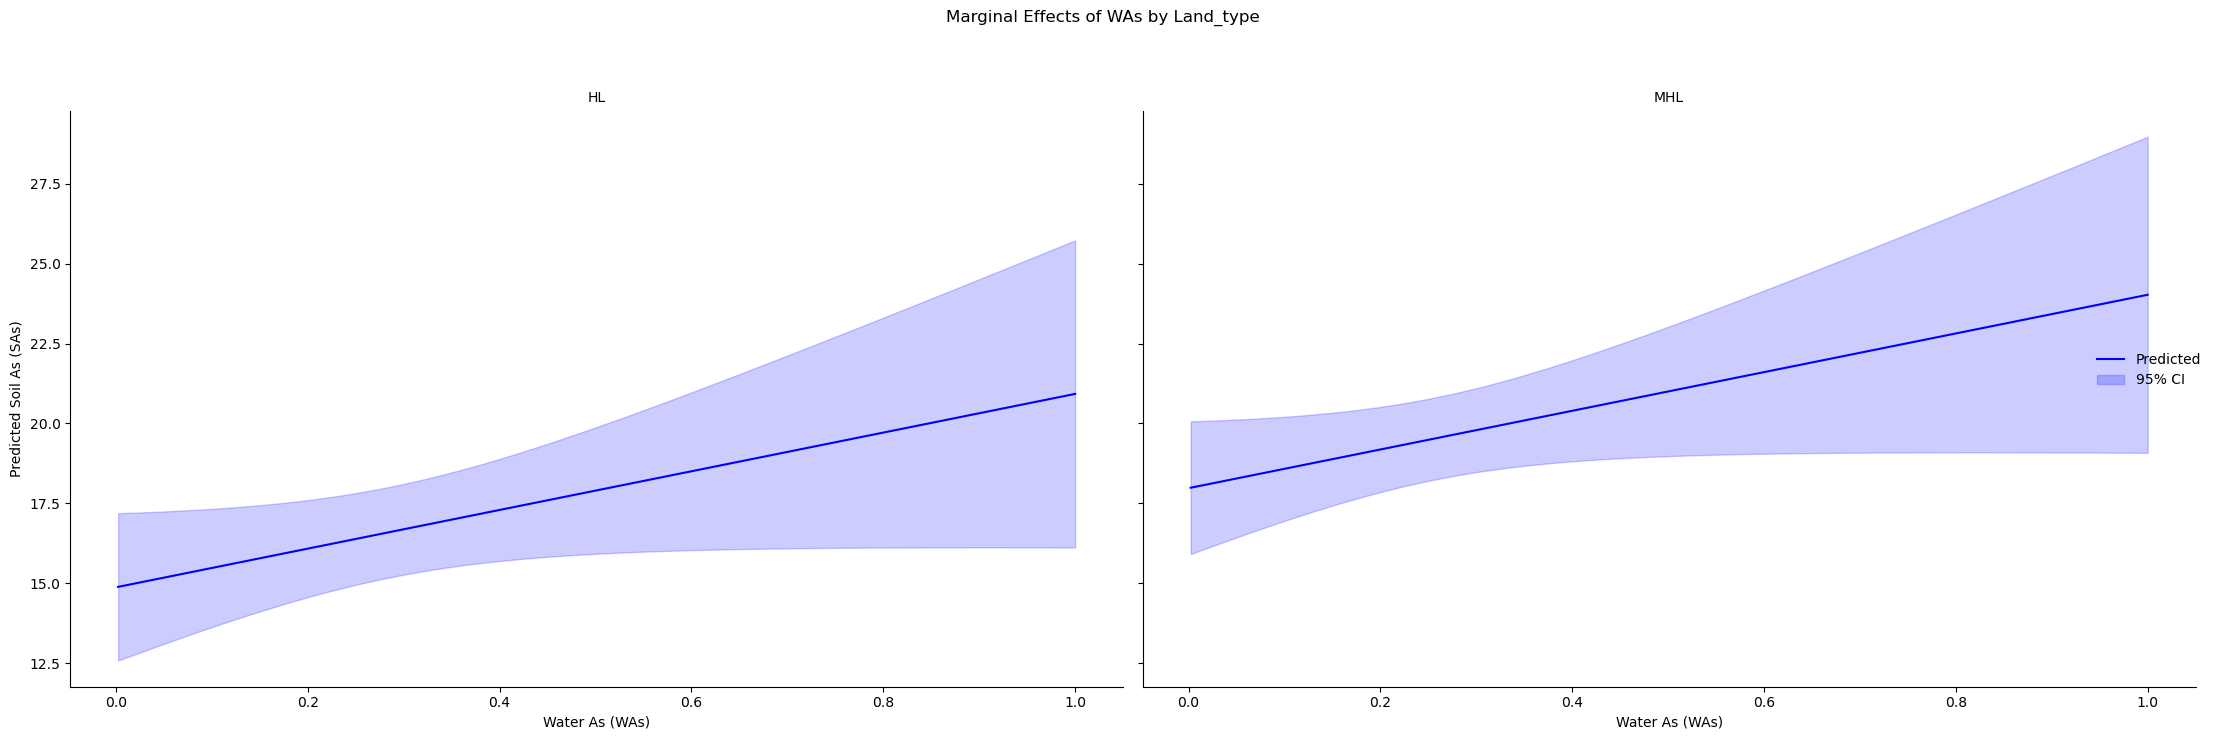

In [45]:
# Compute marginal effects for WAs across Land_type levels
# Create a grid of WAs values
was_range = np.linspace(X_train['WAs'].min(), X_train['WAs'].max(), 100)

# Get unique Land_type levels from dummy columns
land_type_cols = [col for col in X_train.columns if 'Land_type' in col]
land_types = ['HL'] + [col.split('_')[-1] for col in land_type_cols]  # Include reference level

# Prepare data for predictions
pred_data = []
land_type_labels = []
for land_type in land_types:
    # Create a DataFrame with 100 rows for predictions
    temp_data = pd.DataFrame(
        {col: np.repeat(X_train[col].mean(), 100) for col in X_train.columns}
    )
    temp_data['WAs'] = was_range  # Vary WAs
    for col in land_type_cols:
        temp_data[col] = 0  # Reset dummy variables
    if land_type != 'HL':  # Reference level has all dummies = 0
        dummy_col = f'Land_type_{land_type}'
        if dummy_col in X_train.columns:
            temp_data[dummy_col] = 1
    pred_data.append(temp_data)
    land_type_labels.extend([land_type] * 100)

# Concatenate prediction data
pred_data = pd.concat(pred_data, ignore_index=True)

# Verify pred_data columns match X_train
print("pred_data columns:\n", pred_data.columns)
print("X_train columns:\n", X_train.columns)
assert list(pred_data.columns) == list(X_train.columns), "pred_data columns do not match X_train columns"

# Predict with confidence intervals
predictions = fit_glm.get_prediction(pred_data)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% CI
pred_data['Predicted'] = pred_summary['mean']
pred_data['CI_Lower'] = pred_summary['mean_ci_lower']
pred_data['CI_Upper'] = pred_summary['mean_ci_upper']
pred_data['Land_type'] = land_type_labels  # Add Land_type for plotting

# Plot marginal effects with facets
g = sns.FacetGrid(pred_data, col='Land_type', col_wrap=2, height=7, aspect=1.5)
g.map(plt.plot, 'WAs', 'Predicted', color='blue', label='Predicted')
g.map(plt.fill_between, 'WAs', 'CI_Lower', 'CI_Upper', color='blue', alpha=0.2, label='95% CI')
g.set_titles('{col_name}')
g.set_xlabels('Water As (WAs)')
g.set_ylabels('Predicted Soil As (SAs)')
g.fig.suptitle('Marginal Effects of WAs by Land_type', y=1.05)
g.add_legend()
plt.tight_layout()
plt.show()

### Cross-validation

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import KFold

# Load and prepare data (assuming train is the input DataFrame)
# Replace with your actual data loading if different
df = pd.read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/bd_soil_arsenic.csv")

# Define predictors (X) and response (y)
X = df.drop('SAs', axis=1)
y = df['SAs']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Land_type'], drop_first=True)

# Ensure all columns in X are numeric
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Ensure y is numeric
y = pd.to_numeric(y, errors='coerce')



# Add intercept
X = sm.add_constant(X)

# Convert to float64
X = X.astype(np.float64)
y = y.astype(np.float64)

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit GLM
    try:
        model = sm.GLM(y_train, X_train, family=sm.families.Gaussian()).fit()
        y_pred = model.predict(X_test)
        cv_mse.append(np.mean((y_test - y_pred)**2))
    except Exception as e:
        print(f"Error fitting GLM: {e}")
        print("X_train sample:\n", X_train.head())
        print("y_train sample:\n", y_train.head())
        raise



In [52]:
# Print cross-validation results
print("\nCross-validation MSE scores:", cv_mse)
print("Mean CV MSE:", np.mean(cv_mse))


Cross-validation MSE scores: [10.52614382187896, 6.53984339915106, 8.848124335114155, 9.198093225695951, 7.536297753218865]
Mean CV MSE: 8.5297005070118


### Predict on Test Data

In [49]:
# Prepare test data
X_test = test.drop('SAs', axis=1)
y_test = test['SAs']
X_test = pd.get_dummies(X_test, columns=['Land_type'], drop_first=True)
X_test = sm.add_constant(X_test)

# Predict
test['Pred_SAs'] = fit_glm.predict(X_test)

# Performance metrics
rmse = np.sqrt(np.mean((test['SAs'] - test['Pred_SAs'])**2))
mae = np.mean(np.abs(test['SAs'] - test['Pred_SAs']))
mse = np.mean((test['SAs'] - test['Pred_SAs'])**2)
mdae = np.median(np.abs(test['SAs'] - test['Pred_SAs']))

print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MSE: {mse}")
print(f"Test MDAE: {mdae}")

Test RMSE: 5.518308123330903
Test MAE: 4.345593149231319
Test MSE: 30.451724544019836
Test MDAE: 4.234031590745136


### 1:1 Plot



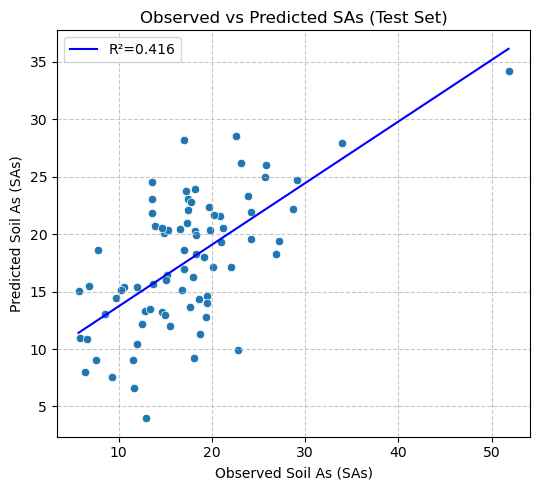

In [62]:
from scipy.stats import linregress

# Check for non-numeric or NaN values
if test['SAs'].isna().any() or test['Pred_SAs'].isna().any():
    print("Warning: NaN values detected in test['SAs'] or test['Pred_SAs']. Dropping NaNs.")
    test = test.dropna()

# Ensure numeric types
test['SAs'] = pd.to_numeric(test['SAs'], errors='coerce')
test['Pred_SAs'] = pd.to_numeric(test['Pred_SAs'], errors='coerce')

# Drop any remaining NaNs
test = test.dropna()

# Scatter plot of observed vs predicted SAs with regression line
plt.figure(figsize=(5.5, 5))
sns.scatterplot(x='SAs', y='Pred_SAs', data=test)

slope, intercept, r_value, _, _ = linregress(test['SAs'], test['Pred_SAs'])
x_range = np.array([test['SAs'].min(), test['SAs'].max()])
plt.plot(x_range, slope * x_range + intercept, color='blue', label=f'R²={r_value**2:.3f}')
plt.xlabel('Observed Soil As (SAs)')
plt.ylabel('Predicted Soil As (SAs)')
plt.title('Observed vs Predicted SAs (Test Set)')
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



## Summary and Conclusion


This comprehensive tutorial covered the essentials of conducting Generalized Linear Model (GLM) regression analysis with a Gaussian distribution with Python, from foundational concepts to advanced interpretation and evaluation techniques. We began by introducing the structure and key components of GLMs, particularly those that use the Gaussian distribution, and explored their suitability for continuous data. Building a GLM model from scratch allowed us to understand the model’s structure, including the linear predictors, error terms, and link functions.

Next, we used Python’s `statsmodels` library to fit a Gaussian GLM more efficiently and compared it with the simpler `lm()` function, which directly applies to linear models. The tutorial guided interpreting model outputs, including understanding coefficients, statistical significance, and key model metrics. For this, we leveraged a range of powerful Python packages such as `statsmodels`, `scikit-learn`, and `matplotlib` to streamline and enhance our interpretation and visualization of GLM outputs, making it easier to extract meaningful insights from the model.

We then addressed model performance evaluation using cross-validation and a hold-out test data set, demonstrating how these methods help assess model generalization and prevent overfitting. By using cross-validation and a separate test data set, we ensured a robust and unbiased estimate of model performance, essential for applying the model confidently to new data.
We also explored the visualization of model assumptions, including residuals analysis, to validate the model's fit and identify potential issues. This step is crucial for ensuring that the assumptions underlying GLMs are met, which enhances the reliability of our conclusions.

Finally, we discussed the importance of marginal effects and adjusted predictions in interpreting complex models, especially when dealing with interaction terms or transformed variables. These techniques provide a clearer understanding of how predictors influence the response variable, making it easier to communicate results to stakeholders.




## References

1.  [6.1 - Introduction to GLMs](https://online.stat.psu.edu/stat504/lesson/6/6.1)

2.  [GLM in R: Generalized Linear Model](https://www.datacamp.com/tutorial/generalized-linear-models)

3.  [GLM in R: Generalized Linear Model with Example](https://www.guru99.com/r-generalized-linear-model.html)

4. [Generalized Linear Models With Examples in R](https://www.academia.edu/37886943/Springer_Texts_in_Statistics_Generalized_Linear_Models_With_Examples_in_R)



